In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import root_mean_squared_error as rmse
import time
import tkinter as tk
from tkinter import messagebox
import math
import matplotlib as mpl
from scipy.spatial import ConvexHull

# our functions
import predict_Beta_I
import choice_start_day
import plot_hyb

import warnings
warnings.filterwarnings(action='ignore')

# to account for updates when files change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_seeds = pd.read_csv('initial_data/seeds_set_parameters.csv')
df_seeds[df_seeds.set!='test']['seed_number'].values

array([   0,    1,    2, ..., 1497, 1498, 1499])

In [13]:
def save_median(seed_dirs, df_seeds, is_filename=False):
    betas = pd.DataFrame()
    fig = plt.figure(figsize=(6, 4)) 
    
    if is_filename:
        col = 'file'
    else:
        col = 'seed_number'
        
    for i in df_seeds[df_seeds.set!='test'][col].values:
        if is_filename:
            df = pd.read_csv(i)
        else:
            df = pd.read_csv(seed_dirs+f'seir_seed_{i}.csv')
        epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
        if epidemic_end.shape[0] > 1:
            df.loc[epidemic_end[0]:, 'Beta'] = -2  # поправил на df.loc[...] вместо df['Beta'].loc[...]

        df = df[['Beta']]
        df.columns = [i]  # Переименовываем колонку 'Beta' в номер сида
        betas = pd.concat([betas, df], axis=1)
    
    chosen_b = betas[betas>=0]
    median_beta = chosen_b.median(axis=1)    

    plt.plot(chosen_b, marker='.', ls='',alpha=0.01, color='tab:blue')
    plt.plot(median_beta, ls='-', color='orange', 
             label='$\mathregular{M_{median}}$')
    plt.ylim(0,betas.max().quantile(0.5))

    median_beta.to_csv(f'{seed_dirs}/median_beta.csv', header=['median_beta'])

## barabasi-albert

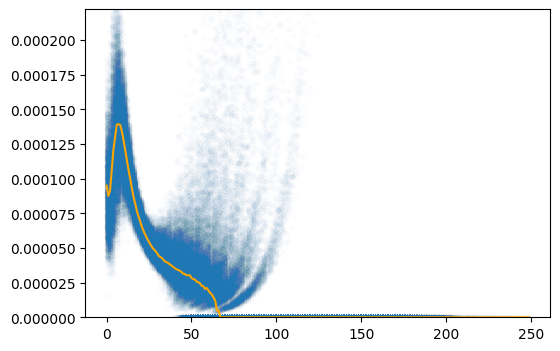

In [13]:
save_median(seed_dirs='initial_data/initial_data_ba_10000/',
           df_seeds)

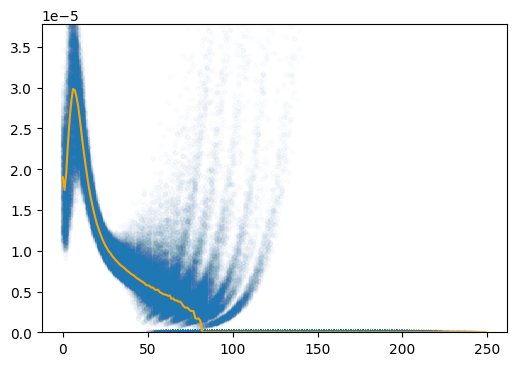

In [5]:
save_median(seed_dirs='initial_data/initial_data_ba_50000/',
           df_seeds)

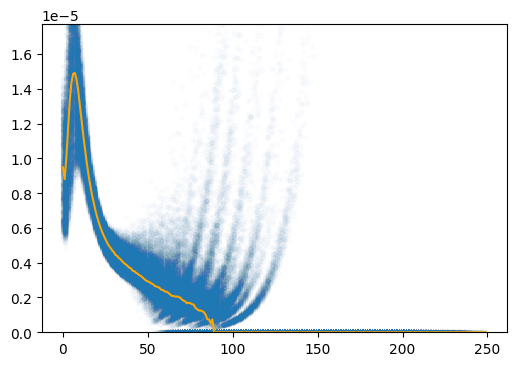

In [6]:
save_median(seed_dirs='initial_data/initial_data_ba_100000/',
           df_seeds)

### new

In [9]:
df_seeds_n = pd.read_csv('initial_data/new_seeds_parameters.csv')

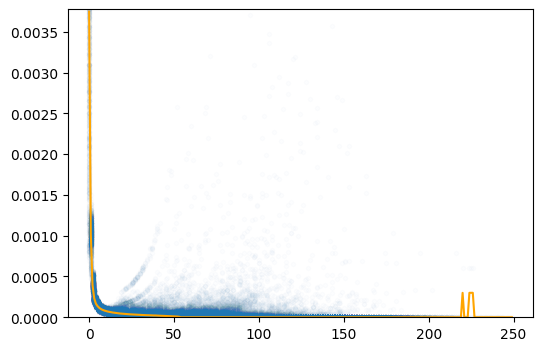

In [14]:
save_median(seed_dirs='initial_data/ba_10000/',
           df_seeds=df_seeds_n, is_filename=True)

(-5.0, 50.0)

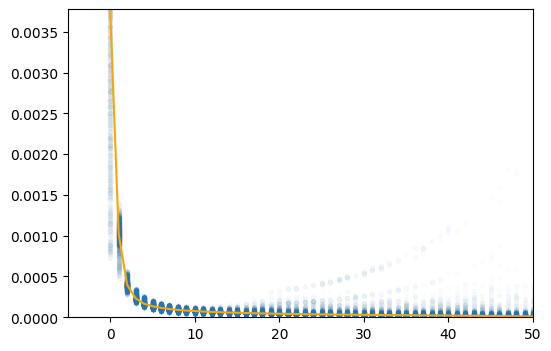

In [15]:
save_median(seed_dirs='initial_data/ba_10000/',
           df_seeds=df_seeds_n, is_filename=True)
plt.xlim(-5, 50)

## small world

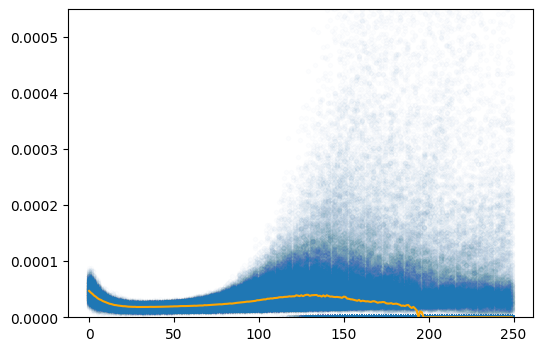

In [7]:
save_median(seed_dirs='initial_data/initial_data_sw_10000/',
           df_seeds)

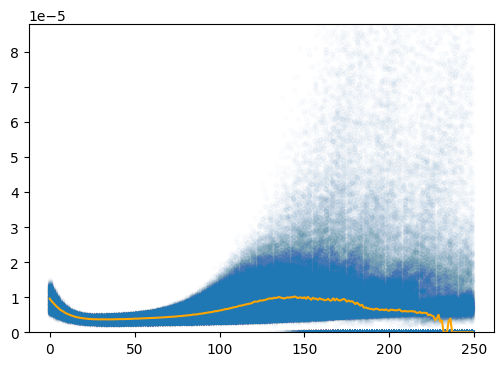

In [8]:
save_median(seed_dirs='initial_data/initial_data_sw_50000/',
           df_seeds)

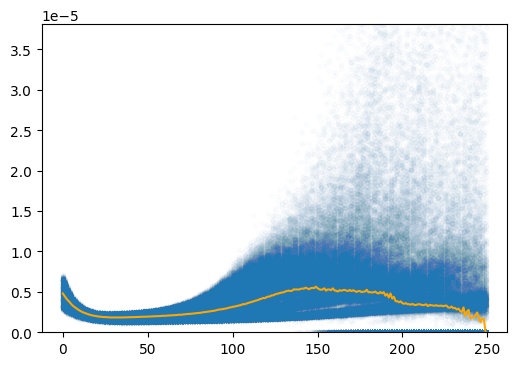

In [9]:
save_median(seed_dirs='initial_data/initial_data_sw_100000/',
           df_seeds)

## random

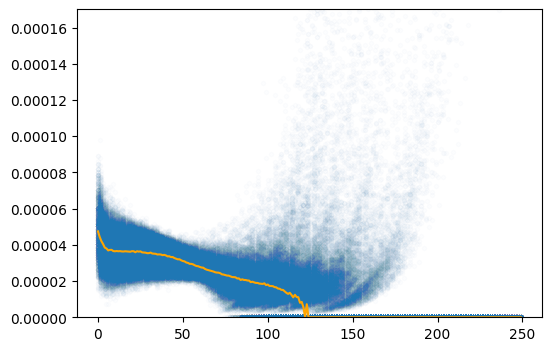

In [18]:
save_median(seed_dirs='initial_data/initial_data_r_10000/',
           df_seeds)

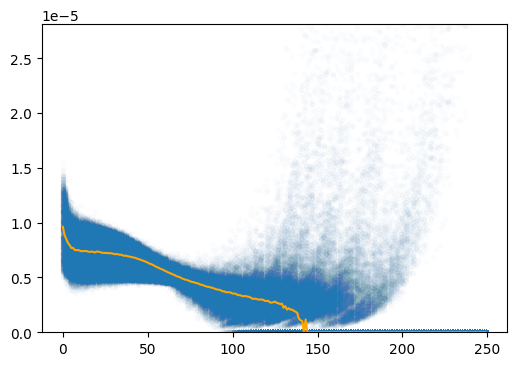

In [19]:
save_median(seed_dirs='initial_data/initial_data_r_50000/',
           df_seeds)

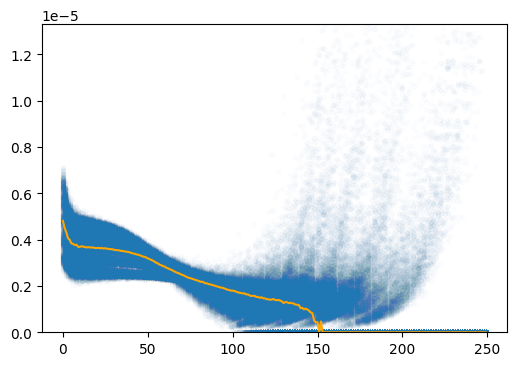

In [20]:
save_median(seed_dirs='initial_data/initial_data_r_100000/',
           df_seeds)